In [1]:
import ast
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

pd.set_option('display.max_columns', None)

## Lectura dataset

In [2]:
path2= "data/nuevoMutua.csv"
df = pd.read_csv(path2, dtype=str, header=[0, 1], index_col=0)
df.head(3)

casos_cc                                                             \
       nsin       ncaso pos        nexp          nepi tipo         ccc   
0  29899501  1300298995   1  1300298995  2019E0001248  ANL  0810971910   
1  29901901  1300299019   1  1300299019  2019E0001274   EC  0802448664   
2  29902501  1300299025   1  1300299025  2019E0001281   EC  0803609685   

                                                                              \
  regimen           regccc situacion es_atipico es_recaida     hay_at_previo   
0    0521  0521/0810971910   Cerrado      False      False  No hay AT previo   
1    0521  0521/0802448664   Cerrado      False      False  No hay AT previo   
2    0521  0521/0803609685   Cerrado      False      False  No hay AT previo   

                                                                           \
  duracion dur_previo dur_std   v_std     f_parte     f_graba      f_baja   
0        6        0.0    15.0     9.0  2019-01-04  2019-01-04  2019-01-02   
1      153        0.0    30.0  -123.0  2019-01-04  2019-01-04  2019-01-02   
2       30        0.0    15.0   -15.0  2019-01-04  2019-01-04  2019-01-03   

                                              \
   f_alta_adm  f_alta_med med_clave cie9_cod   
0  2019-01-07  2019-01-07       469    959.8   
1  2019-06-03  2019-06-03       856   726.90   
2  2019-02-01  2019-02-01       222     490.   

                                                               \
                                          cie9_descr dele_cod   
0  TRAUMISMO NO ESPECIF. OTROS SITIOS ESPECIFICAD...      108   
1                   ENTESOPATIA, LUGAR NO LOCALIZADO      108   
2  BRONQUITIS NO ESPECIFICADA COMO AGUDA NI COMO ...      117   

                                                                  \
               dele_nombre d_sem_baja mes_baja es_trafico gestor   
0  DELEGACION DE BARCELONA  MIERCOLES    ENERO      False   1042   
1  DELEGACION DE BARCELONA  MIERCOLES    ENERO      False   1042   
2       DELEGACION DE OLOT     JUEVES    ENERO      False   1021   

                                                                  \
  es_pl_empleado es_pl_activo es_pago_dir es_susp_ext f_susp_ext   
0          False        False       False       False        NaN   
1          False        False        True       False        NaN   
2          False        False        True       False        NaN   

                                                                           \
  es_derecho_cobro es_alta_prev_insp es_recaida_ip_denegada es_covid  mpq   
0             True             False                  False    False  NaN   
1             True             False                  False    False    M   
2             True             False                  False    False  NaN   

   casos_ep                                                             \
  es_atrium f_atrium prop_atrium f_resp_atrium resp_atrium    f_ini_pd   
0     False      NaN         NaN           NaN         NaN         NaN   
1     False      NaN         NaN           NaN         NaN  2019-01-05   
2     False      NaN         NaN           NaN         NaN  2019-01-06   

                             aut                                           \
  motivo_pd nrehab nbio registro ent_at sit_trab UG_TGSS sexo    FECHA_AT   
0       NaN    0.0  0.0       01    007       52  082020    M  2017-07-01   
1  1.2 SETA   16.0  0.0       01    007       01  081111    H  2019-01-01   
2  1.2 SETA    0.0  0.0       01    007       01  170404    H  2019-01-01   

                                                                      \
  OPCION_IT FECHA_OPCION MUTUA_IT FECHA_MUTUA_IT base_coti colectivo   
0      True   2017-07-01      007     2017-07-01   2000.69   0200069   
1      True   1996-01-01      007     2015-01-01    2077.8   0207780   
2      True   2003-02-01      007     2003-02-01    1500.0   0150000   

                                                                            \
  f_alta_o_ss 

In [3]:
# df[('creadas', 'f_baja')] = df[('creadas', 'f_baja')].replace('2099-12-31', np.nan)


convert_dict = {
    ('casos_cc', 'duracion'): float, 
    ('casos_cc', 'dur_previo'): float, 
    ('casos_cc', 'dur_std'): float, 
    ('casos_cc', 'v_std'): float,
    ('casos_ep', 'nrehab'): float, 
    ('casos_ep', 'nbio'): float,
    ('aut', 'base_coti'): float, 
    ('creadas', 'edad'): float, 
    ('creadas', 'naltas'): float,
    ('creadas', 'next_fest'): float, 
    ('creadas', 'past_fest'): float,
    ('creadas', 'nfest_14'): float, 
    ('creadas', 'peso'): float, 
    ('creadas', 'dist_ult_baja'): float,
    ('creadas', 'avg_altas'): float,
    ('creadas', 'alta_oficio'): float,
    ('creadas', 'nrecaidas'): float,
    ('creadas', 'ncasos'): float,
    ('creadas', 'diff_ant_caso'): float,
    ('creadas', 'diff_ant_med_adm'): float,
    ('creadas', 'mean_ant_med_adm'): float,
    ('creadas', 'prev_rechazado'): float

}
df = df.astype(convert_dict)

date_cols = [
    ('casos_cc', 'f_parte'), ('casos_cc', 'f_graba'), ('casos_cc', 'f_baja'), ('casos_cc', 'f_alta_adm'), ('casos_cc', 'f_alta_med'), ('casos_cc', 'f_susp_ext'),
    ('casos_ep', 'f_atrium'), ('casos_ep', 'f_resp_atrium'), ('casos_ep', 'f_ini_pd'), 
    ('aut', 'FECHA_AT'), ('aut', 'FECHA_OPCION'), ('aut', 'FECHA_MUTUA_IT'), ('aut', 'f_alta_o_ss'), ('aut', 'f_cese'), ('aut_fijo', 'f_nacm'),
    ('creadas', 'f_alta'), ('creadas', 'f_baja')

]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d').dt.date


df[('aut', 'HORA_PRE')] = pd.to_datetime(df[('aut', 'HORA_PRE')], format='%H:%M:%S').dt.time

In [4]:
df.shape

(10018, 111)

In [5]:
df[('creadas','diff_alta_adm_med')] = (df[('casos_cc','f_alta_adm')] - df[('casos_cc','f_alta_med')]).dt.days

df[('creadas','es_alta_adm_post_med2')] = [1 if i<0 else 0 for i in df[('creadas','diff_alta_adm_med')]]

/tmp/ipykernel_3543/1998782952.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[('creadas','diff_alta_adm_med')] = (df[('casos_cc','f_alta_adm')] - df[('casos_cc','f_alta_med')]).dt.days
/tmp/ipykernel_3543/1998782952.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[('creadas','es_alta_adm_post_med2')] = [1 if i<0 else 0 for i in df[('creadas','diff_alta_adm_med')]]


In [6]:
df.shape

(10018, 113)

In [7]:
def tablas_en_csv(csv,*, verbose=False):
    '''
    Funcion para visualiar el numero de tanlas en el dataframe 
    
    Retorna los nombres de las tablas
    '''
    llaves = list(csv.keys())
    if type(llaves[0]) == tuple:
        llaves = np.array(llaves)
        tablas = set(llaves[:,0])
        if verbose:
            print(f'Hay {len(tablas)} tablas')
        return list(tablas)
    else:
        print(f'El dataset contiene una unica tabla')

In [8]:
tablas = tablas_en_csv(df,verbose=True)
tablas

Hay 7 tablas


['aut',
 'casos_cc',
 'aut_fijo',
 'casos_ep',
 'detectives',
 'creadas',
 'criterios']

In [9]:
tablasdf = dict()
for i in tablas:
    tablasdf[i] = df[i]

## CSV con las variables relevantes

In [10]:
# Dataset con las seleccion de variables y si son categoricas
dat = pd.read_csv("data/PrimerCategorico3.csv", sep=";")

In [11]:
dat

,historico,registro,ent_at,sit_trab,sexo,FECHA_AT,base_coti,colectivo,N_RED,i_auto,sist_es,i_trade,cese,c2,c4,c5,c10,c12,ncaso,pos,tipo,regimen,es_atipico,es_recaida,hay_at_previo,duracion,dur_previo,dur_std,v_std,med_clave,cie9_cod,d_sem_baja,mes_baja,es_trafico,es_pl_empleado,es_pl_activo,es_pago_dir,es_susp_ext,es_derecho_cobro,es_alta_prev_insp,es_recaida_ip_denegada,mpq,edad,naltas,provincia,next_fest,past_fest,resultado,es_atrium,prop_atrium,resp_atrium,motivo_pd,nrehab,nbio,UG_TGSS,OPCION_IT,FECHA_OPCION,MUTUA_IT,FECHA_MUTUA_IT,f_alta_o_ss,HORA_PRE,nacion,f_trade,cnae9,f_cese,dele,tipo_situ,nsin,nexp,nepi,ccc,regccc,situacion,f_parte,f_graba,f_baja,f_alta_adm,f_alta_med,cie9_descr,dele_cod,dele_nombre,gestor,f_susp_ext,es_covid,f_nacm,f_atrium,f_resp_atrium,f_ini_pd,c1,c3,c6,c7,c8,c9,c11,c13,c14,gr_edad,f_alta,dist_ult_baja,avg_altas,alta_oficio,nrecaidas,ncasos,diff_ant_caso,diff_ant_med_adm,mean_ant_med_adm,prev_rechazado,nfest_14,peso
0,n,n,n,n,y,n,y,n,n,y,y,n,y,y,y,y,y,y,n,n,n,n,y,y,y,y,y,y,y,n,n,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,y,y,y,y,y,y,y,y,y,n,n
1,n,y,y,y,y,n,n,n,n,y,y,y,y,y,y,y,y,y,n,y,y,y,y,y,y,n,n,n,n,y,y,y,y,y,y,y,y,y,y,y,y,y,n,n,y,n,n,y,y,y,y,y,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,n,y,n,n,n,n,n,y,n,n


In [12]:
# Union de las tablas en un solo dataset

df = pd.concat(tablasdf.values(), axis=1)

df.shape

(10018, 113)

In [13]:
new = pd.DataFrame({"diff_alta_adm_med":["y","n"],
 "es_alta_adm_post_med2":["y","n"]})

In [14]:
new

,diff_alta_adm_med,es_alta_adm_post_med2
0,y,y
1,n,n


In [15]:
dat = pd.concat([dat,new], axis=1)

In [16]:
dat.shape

(2, 112)

In [17]:
%%time
def selectFromDat(df, dat):
    dataF = dict()
    for key in dat.keys():
        if key in df.keys():
            if list(dat[key])[0] == "n":
                continue
            if list(dat[key])[1] == "n":
                dataF[key] = df[key]
            else:
                dataF[key] = df[key].astype("category")
    
    return pd.DataFrame(dataF)
    
data = selectFromDat(df, dat)

CPU times: user 52.4 ms, sys: 3.48 ms, total: 55.8 ms
Wall time: 54.7 ms


In [18]:
y = data["resultado"].astype("str")

In [19]:
for i, val in enumerate(y):
    if val == "Sin detective":
        y[i] = -1
    elif val == "NEGA" or val == "CANC" or val == "PEND":
        y[i] = 0
    else:
        y[i] = 1

In [20]:
y.value_counts()


-1    9331
 1     353
 0     334
Name: resultado, dtype: int64

In [21]:
condition = (y == 0) | (y == 1)

In [22]:
Y = y[condition].astype("int")

In [23]:
socec = pd.read_csv("data/socec_data_fil.csv", index_col="Unnamed: 0")

In [24]:
data = pd.concat([data,socec], axis=1)

In [25]:
x = data.drop("resultado", axis=1)

In [26]:
x["es_alta_adm_post_med2"] = x["es_alta_adm_post_med2"].astype("category")

In [27]:
X = x.loc[condition,:]

In [28]:
X.shape

(687, 278)

In [ ]:
X["c"]

In [31]:
X[["c4","c5","c2","c10","c12"]].value_counts()

c4     c5     c2     c10    c12  
False  False  False  False  False    655
                            True      11
              True   False  False      8
       True   False  False  False      7
       False  False  True   False      4
       True   False  True   False      2
dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
def scale(data: pd.DataFrame,*,scaler=None):
    '''
    Escalado de los datos 
    
    Funcion que se encarga de escalar los datos correspondites a valores numericos dentro de un dataset.
    Se ha de ajustar los datos unicamete a los valores del train en el train-test split, impidiendo el transbase de información desde
    test a train.
    
    Se retorna el dataset y el scaler.
    
    Si no se pasa un scaler se crea uno 
    '''
    Numdata = data.select_dtypes(include="number")
    if scaler == None:
        print("No hay scaler\nCreando scaler ==> StandardScaler()")
        scaler = StandardScaler()
        scaler.fit(Numdata)
        
    Numdata = pd.DataFrame(scaler.transform(Numdata), columns=Numdata.columns)
    Othdata = data.select_dtypes(exclude="number")
    Othdata = Othdata.reset_index()
    Othdata = Othdata.drop("index", axis=1)
    data = pd.concat([Numdata, Othdata], axis=1)
    return data, scaler
    

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8,random_state = 2,shuffle = True)

In [31]:
X_train, scaler = scale(X_train)

No hay scaler
Creando scaler ==> StandardScaler()


In [32]:
X_test, scaler = scale(X_test,scaler=scaler)

## XGBoost Classification

In [33]:
import xgboost as xgb

In [34]:
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = xgb.XGBClassifier(tree_method="hist",enable_categorical=True )
# X is the dataframe we created in previous snippet
clf.fit(X_train, Y_train)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [35]:
# Get a graph
graph = xgb.to_graphviz(clf, num_trees=1)
# Or get a matplotlib axis
#ax = xgb.plot_tree(clf, num_trees=1,)
# Get feature importances
clf.feature_importances_

array([0.00716123, 0.00943971, 0.        , 0.00795933, 0.0067581 ,
       0.00868117, 0.00097451, 0.01023212, 0.00708654, 0.00302676,
       0.        , 0.01274981, 0.00433998, 0.        , 0.00323961,
       0.01564424, 0.0056758 , 0.01104799, 0.0496015 , 0.01501989,
       0.00423996, 0.00194311, 0.00362399, 0.        , 0.00596416,
       0.0073709 , 0.01219026, 0.00012411, 0.        , 0.        ,
       0.02486761, 0.        , 0.00933872, 0.000708  , 0.        ,
       0.        , 0.        , 0.        , 0.01154204, 0.00095   ,
       0.        , 0.00068059, 0.        , 0.00976537, 0.00321436,
       0.00621267, 0.00978647, 0.        , 0.00462991, 0.00106606,
       0.007514  , 0.01056048, 0.00152285, 0.        , 0.01081131,
       0.00067062, 0.01055199, 0.01626111, 0.        , 0.00378906,
       0.01178874, 0.00710604, 0.        , 0.02734802, 0.00341389,
       0.00430684, 0.00461496, 0.        , 0.00081118, 0.00239482,
       0.00466153, 0.00574551, 0.        , 0.        , 0.00402

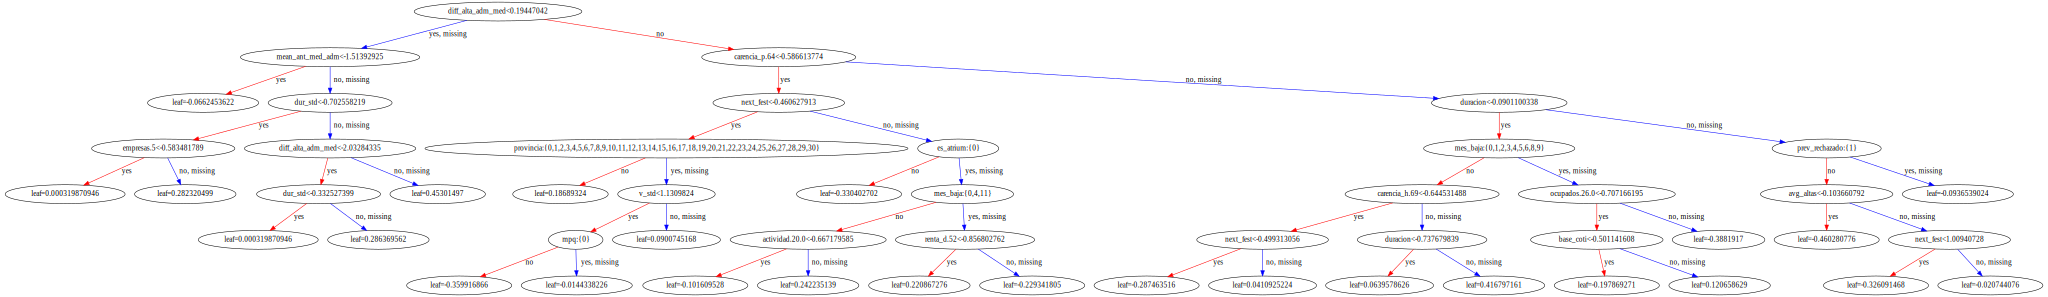

In [36]:
graph

In [37]:
clf.score(X_test,Y_test)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (


0.7101449275362319

In [38]:
y_pred = clf.predict(X_test)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
confusion_matrix(Y_test,y_pred)

array([[49, 21],
       [19, 49]])

In [40]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        70
           1       0.70      0.72      0.71        68

    accuracy                           0.71       138
   macro avg       0.71      0.71      0.71       138
weighted avg       0.71      0.71      0.71       138



In [41]:
X_sindetective = x.loc[~condition,:]
Y_sindetective = y[~condition]

In [42]:
X_sindetective, scaler = scale(X_sindetective,scaler=scaler)

In [43]:
y_pred_sin = clf.predict(X_sindetective)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [44]:
pd.Series(y_pred_sin).value_counts()

0    6346
1    2985
dtype: int64

In [45]:
import seaborn as sns 

In [46]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

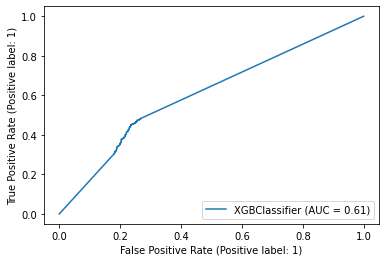

In [75]:
RocCurveDisplay.from_estimator(clf,X_test, Y_test)

In [48]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = Y_test.to_numpy()

fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_pred)
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

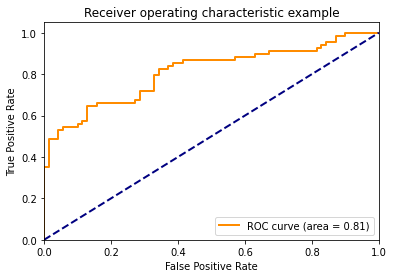

In [49]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")

#plt.vlines(_,0,1)
plt.show()

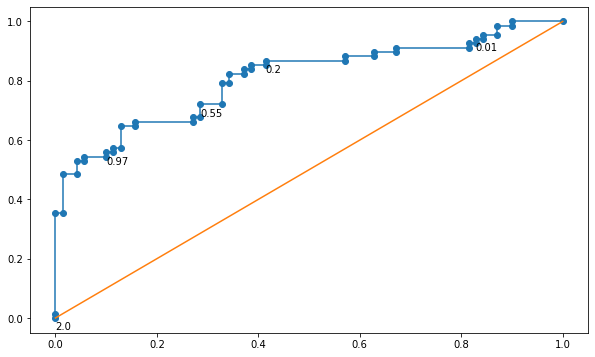

In [50]:
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::10], tpr[::10], _[::10]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
#threshold_of_interest = _[np.argmax(tpr - fpr)]

In [51]:
def roc_casera(clf, y_test, X_test, n_thres):
    fpr, tpr = [1,], [1,]
    thresholds = np.linspace(0.000000000001,0.9999999999,n_thres)
    prob = clf.predict_proba(X_test)[:,1]
    
    for i in thresholds:
        f, t, _ = roc_curve(y_test, list(map(lambda x: 1 if x>i else 0, prob)))
        fpr.append(f[1])
        tpr.append(t[1])
    fpr.append(0)
    tpr.append(0)
    return fpr, tpr, thresholds

fpr, tpr, _ = roc_casera(clf, Y_test, X_test, 1000)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

## Estudio con los datos ya obtenidos  

In [52]:
y  = df.resultado.copy()

In [53]:
for i, val in enumerate(y):
    if val == "Sin detective":
        y[i] = -1
    elif val == "NEGA" or val == "CANC" or val == "PEND":
        y[i] = 0
    else:
        y[i] = 1

In [54]:
y[y==-1] = y_pred_sin 

In [55]:
y.value_counts()

0    6680
1    3338
Name: resultado, dtype: int64

In [57]:
data = data.drop(["diff_alta_adm_med","es_alta_adm_post_med2"], axis=1)

In [58]:
x = data.drop("resultado", axis=1)

In [60]:
X = x

In [61]:
X.shape

(10018, 276)

In [62]:
Y = y.astype("category")

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8,random_state = 2,shuffle = True)

In [64]:
X_train, scaler = scale(X_train)

No hay scaler
Creando scaler ==> StandardScaler()


In [65]:
X_test, scaler = scale(X_test,scaler=scaler)

## XGBoost Classification

In [66]:
import xgboost as xgb

In [67]:
# Supported tree methods are `gpu_hist`, `approx`, and `hist`.
clf = xgb.XGBClassifier(tree_method="hist",enable_categorical=True )
# X is the dataframe we created in previous snippet
clf.fit(X_train, Y_train)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [68]:
# Get a graph
graph = xgb.to_graphviz(clf, num_trees=1)
# Or get a matplotlib axis
#ax = xgb.plot_tree(clf, num_trees=1,)
# Get feature importances
clf.feature_importances_

array([1.6451143e-03, 2.9116760e-03, 0.0000000e+00, 1.4095430e-03,
       1.6599501e-03, 1.3923093e-03, 5.0687650e-03, 3.9776950e-03,
       2.2991155e-03, 0.0000000e+00, 0.0000000e+00, 7.8424819e-02,
       3.1741627e-03, 0.0000000e+00, 1.9003652e-07, 1.1879288e-02,
       7.8642284e-09, 6.8115622e-07, 1.6800484e-02, 4.8204763e-03,
       2.6655619e-06, 7.6546021e-06, 4.3060184e-03, 2.4647391e-06,
       5.5875402e-04, 4.1827774e-03, 8.2968902e-03, 4.8726950e-02,
       6.4519508e-04, 9.1205741e-04, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.2409326e-04, 0.0000000e+00, 0.0000000e+00,
       1.4916733e-05, 1.4431372e-02, 6.6815608e-04, 4.2352662e-03,
       9.7387074e-06, 1.2047723e-02, 6.2507903e-04, 3.6499507e-06,
       0.0000000e+00, 8.0068136e-04, 1.6557457e-02, 3.1085266e-04,
       8.0404291e-03, 0.0000000e+00, 0.0000000e+00, 7.0947651e-03,
       0.0000000e+00, 6.1690025e-06, 1.7495392e-02, 3.3011416e

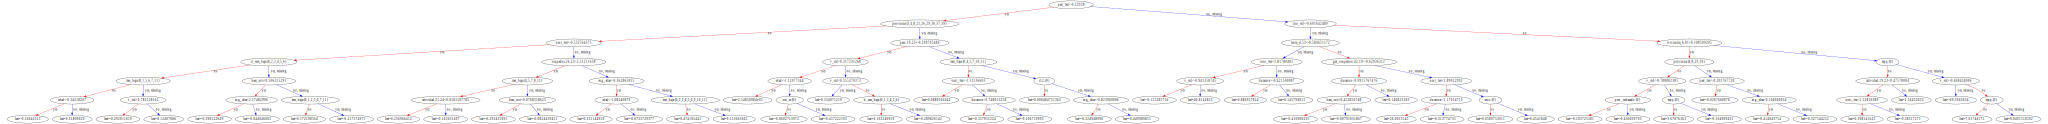

In [69]:
graph

In [70]:
clf.score(X_test,Y_test)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

0.6497005988023952

In [71]:
y_pred = clf.predict(X_test)

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
confusion_matrix(Y_test,y_pred)

array([[1088,  251],
       [ 451,  214]])

In [73]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1339
           1       0.46      0.32      0.38       665

    accuracy                           0.65      2004
   macro avg       0.58      0.57      0.57      2004
weighted avg       0.63      0.65      0.63      2004



/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
/home/victor/Victor/Work/CIC/.pyenv/lib/python3.10/site-packages/xgboost/data.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

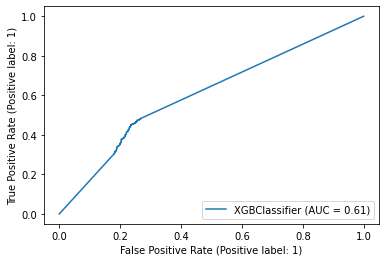

In [74]:
RocCurveDisplay.from_estimator(clf,X_test, Y_test)

In [ ]:
from sklearn.semi_supervised import LabelPropagation